> This post is based on the [fastook draft chapter_04](https://github.com/fastai/fastbook/blob/master/04_mnist_basics.ipynb). The ideas presented in this post are the learnings which I got by reading the fastbook.

Many of you must be knowing that the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) is a toy example to learn the tricks of machine learning but a  few years ago recognizing handwritten digits using machine learning was a very challenging task.

This simple dataset makes it possible for us to apply simple models quickly with less compute resource. This helps us to learn,  experiment and benchmark different machine learning techniques and algorithms.

In this post we will use this dataset to build a very simple model which can recognize handwritten digits but we won't be using machine learning or any other fancy techniques to do that.

Keep reading to find out how 👇👇

## Get Necessary Things First

First import the vision module in fastai. This provides you with ussefull functions which can be used in the later part of this post. For people who are new to python, the `from ... import` is a way to tell python that "from" a directory/file "import" something

In [1]:
from fastai.vision.all import *

Fastai makes it easy to play around with the MNIST dataset by providing  a subset of this dataset. This can be downloaded using the `untar_data` function. Provide the `URLs.MNIST_SAMPLE` part inside the function and that dataset will be downloaded for you, unzipped and the path will be returned. 

It can't get any easier 😉

In [2]:
path=untar_data(URLs.MNIST_SAMPLE)

I will quickly check what I have got in the `path` variable.

In [3]:
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/valid'),Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/train')]

The `path` variable is an object of an internal class in python. This class is `Path` which gives you a method `ls()` which gives you back all the contents in a path.

As you see I got 2 folders and 1 file in there.
1. valid
2. train
3. labels.csv

I will also do a quick check of what I got inside the train folder. Doing quick checks like this helps me to know my position in this world 👼.

Sorry I got a little carried away out there. What I meant was that by doing quick checks I know I am dealing with the right things

Once again I will use the `ls` method to list things inside a directory.

In [4]:
imgof3=(path/'train'/'3').ls()

Fastai wraps another inside it to help you work with images in a easier way. This is the ["PIL" library](https://pillow.readthedocs.io/en/stable/). This provides a class `Image` which has a method `open`. this opens up an image for you.

In [5]:
Image.open(imgof3[1])

Look! We got a 3 in there.

One thing to note is that the "3" which you see above is an image but computers can use plain images for anything. They can only understand numbers.

What do we do now?

## Prepare The Ingredients🍞


We will have to convert these images into numbers. For this fastai provides a function known as `tensor` which converts the image into a matrix of numbers.

Let's see what this function does. You can do this by putting a question mark(?) after this function. This is a way in which jupyter notebook allows you to view the details about an object(functions, classes etc.)

In [6]:
tensor?

Doing the above trick gives you a view of the function signature and the arguments which the function accepts. This function has a similar cousin in the pytorch library which does the same thing but the fastai's version handles lists as well.

Remember that an image is actually a matrix of numbers. Read this [article](https://medium.com/ml-and-automation/how-do-convolutional-neural-network-works-c0b0a93697e6) where I explain this in detail with visualization. Since an image is just a collection of numbers, the `tensor` function takes it and gives back a multidimensional representation of this image.

> Don't be afraid of the **Tensor**. A tensor is actually similar to a multidimensional array like this `[[1 2], [3 4]]`. The deep learning world is full of jargons and this is one example of such a jargon.

In the below code I call the `Image.open` method from the PIL library and feed it a sample image from the `imgof3` variable.

> Look how I wrap the `Image.open` method inside the `tensor` function. In python you can do like this `func1(func2(func3...))`. This executes the innermost function first and then gradually moves out towards the outer function.

In [7]:
tensorof3=tensor(Image.open(imgof3[1]))
tensorof3[:10]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   7, 146, 229, 254, 255, 255,
         254, 255, 255, 197,  63,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,  3

Look! what we got from the image. It's hard to make out if it's a 3 in there or something else 🤨. Let's get a better look at it. To do this I take this into a pandas dataframe and then display it with some color. 

I have taken the below code from the [fastbook-chapter04](https://github.com/fastai/fastbook/blob/master/04_mnist_basics.ipynb)

In [8]:
df=pd.DataFrame(tensorof3[4:24,4:24])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Blues')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,7,146,229,254,255,255,254,255,255,197,63,0,0,0,0,0
2,0,0,0,35,61,91,177,177,154,109,177,177,207,253,208,13,0,0,0,0
3,0,0,0,47,0,0,0,0,0,0,0,0,59,249,224,24,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,101,234,253,170,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,52,232,253,198,21,0,0,0,0,0
6,0,0,0,0,0,0,0,0,3,136,241,251,154,17,0,0,0,0,0,0
7,0,0,0,0,0,0,0,45,139,253,219,74,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,67,240,253,145,29,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,45,249,245,60,5,0,0,0,0,0,0,0,0,0,0


In the above section I have taken a part of the 3's matrix in a dataframe and styled it with pandas inbuilt styling. This darkens the portion of the 3's matrix which have pixels other than 0.

See, how the shape of '3' become more evident with this.

Follow this [link](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html) to learn more about the styling in Pandas.

Similar to what we did in previous section, we can also do for the images of '7' and convert those into tensors.

In [9]:
imgof7=(path/'train'/'7').ls()
tensorof7=tensor(Image.open(imgof7[1]))
tensorof7[:10]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

Devising a nifty function to summarise all the steps which I did in the previous section.

> It's a good practice to leave a trail of small functions where you feel that some steps are to be repeated down the line. These functions will come handy later on as it will make your code re-usable.

In [10]:
def tensorsofnum(imgofnum):
    return [tensor(Image.open(img)) for img in imgofnum]

Utilizing the above function to build a list of tensors for the images of 3 and 7

In [11]:
tensorsof3=tensorsofnum(imgof3)
tensorsof7=tensorsofnum(imgof7)

Let's see if we got all images as tensors.

In [12]:
(len(tensorsof3),len(tensorsof7))

(6131, 6265)

It's looking good. let's move ahead.

We have got our images as numbers. What's next? From now on we can use these numbers to build a model which can distinguish between 3 and 7. To do this we won't use any machine learning, rather we would use simple programming to achieve this.

One simple model would be find out how an ideal 3 or an ideal 7 would look like and then find which sample images are more close to the ideal 3 or ideal 7.

Finding the ideal 3 and ideal 7 is relatively easy. We will walk the following path to do this-->

* Combine all of our 3-tensor and 7-tensor into a single tensor.
* Find the average of these combined tensor(average of 3 and 7 separately).

To combine the tensors of 3 and 7 into a single tensor, we will stack all these tensors on top of each other. Pytorch provides a function `stack` to do this.

In [13]:
stacked3=torch.stack(tensorsof3).float()/255
stacked7=torch.stack(tensorsof7).float()/255
stacked3.shape

torch.Size([6131, 28, 28])

Here we go. I stacked the 3's and 7's into a single tensor and printed out the shape of the tensor to make sure that I didn't lose any information. As you see, `tensor3` was of shape 6131(refer to previous sections) and the `stacked3` also has a size of 6131. What are the extra numbers? 

The extra numbers that you see denotes that the resulting tensor is of `28*28` pixels size.

This tensor i.e. 'stacked3' is known as a rank-3 tensor which means that it has 3 dimensions.

Next, I will find the average of the stacked pixels using `mean` function like so.

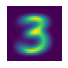

In [14]:
ideal3=stacked3.mean(0)
show_image(ideal3)

We can do the same for finding the ideal 7

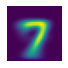

In [15]:
ideal7=stacked7.mean(0)
show_image(ideal7)

## Cooking up the model🍳

Our humble model has to find out which samples are nearer to the ideal 3 and which samples are nearer to the ideal 7. I will pull out a sample 3 and a sample 7 from the stack tensor which I created in the previous section and then find which is nearer to the ideal 7 and which is nearer to the ideal 3.

First I will take our one sample 3 and one sample 7 from our stacked 3 and stacked 7.

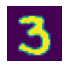

In [16]:
sample3=stacked3[0]
show_image(sample3)

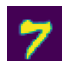

In [17]:
sample7=stacked7[0]
show_image(sample7)

Here I will show one of the methods to find the distance of the samples from the ideal 3 and ideal 7. Another method in adiiton to this is shown in the [fastook draft chapter_04](https://github.com/fastai/fastbook/blob/master/04_mnist_basics.ipynb) and I suggest that you read the book as such methods are explained in much more vivid way in that chapter.

The method which I show here is to find the mean of the absolute of the differences between the sample data with the ideal data. Now, that's a mouthful 🤯 so I will put it in simple terms.

You can find the distance between the sample and ideal data point by getting the difference between the two data points but you can't just find the difference and add up all the differences. This is because some data points fall on the negative side and some on the positive side. Adding up there differences will cancel each other iut. Due to this we find the absolute values of these differences and then find the mean like so. 

In [18]:
distfromideal3=(sample3-stacked3).abs().mean()
distfromideal3

tensor(0.1479)

Similar thing we will do for the distance of sample 7 from the ideal 7

In [19]:
distfromideal7=(sample3-stacked7).abs().mean()
distfromideal7

tensor(0.2049)

Look! how the sample 3's distance from the ideal 3 is less than the sample 3's distance from the ideal 7. This property can be used to identify if a sample is closer to 3 or 7. 

The closer a sample is to a particular ideal digit, the more likely it is that the sample belongs to that category. The thing that we did above to calculate loss is known as mean absolute value and in fancier terms is known as l1_loss.

So, here we goes another jargon which we successfully debunked.👍

This is available in pytorch and in fastai as `F.l1_loss`. Look below how I do this.

In [20]:
F.l1_loss(sample3.float(),stacked3)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Using a target size (torch.Size([6131, 28, 28])) that is different to the input size (torch.Size([28, 28])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  """Entry point for launching an IPython kernel.


tensor(0.1479)

Now we stack the digit samples from the valid directory. We can use this later to measure the accuracy of our model.
Here we will repeat all the steps which we did in previous sections.

In [21]:
validset_3=(path/'valid'/'3').ls()
validset_7=(path/'valid'/'7').ls()
validset_3_tensors=tensorsofnum(validset_3)
validset_7_tensors=tensorsofnum(validset_7)
(len(validset_3_tensors),len(validset_7_tensors))

(1010, 1028)

In [22]:
valid_stacked3=torch.stack(validset_3_tensors).float()/255
valid_stacked7=torch.stack(validset_7_tensors).float()/255

We can create a function to calculate the distance of a sample from the ideal 3.

In [23]:
def distance(sample, mean): return (sample-mean).abs().mean((-1,-2))    

Checking if the function works.

In [24]:
dist=distance(sample3, stacked3)
dist

tensor([0.0000, 0.1598, 0.1185,  ..., 0.1731, 0.1049, 0.1627])

Cool! it works.

We can do one more thing. We can create a function which would compare a sample's distance from the ideal 3 or ideal 7 and It would return true if it's close to 3 or else will return false.

This will be our humble model.

In [25]:
def is3(sample):    return distance(sample, ideal3)<distance(sample, ideal7)

Creating a quick test to see if our model works.
> As you walk through the steps in your project, small tests like this helps you to keep tabs on your mistakes.

In [26]:
is3(sample3)

tensor(True)

In [27]:
is3(sample7)

tensor(False)

We also need a metric to measure the accuracy of our predcition. To do this we will take the predictions of all the samples of 3 and find the average. For samples of 7 we will take the inverse of the 7's prediction's average.

All this will be done for the validation set as those are the samples which we haven't seen yet.

In [28]:
accuracyof3= is3(valid_stacked3).float().mean()
accuracyof3

tensor(0.9168)

In [29]:
accuracyof7= (1-is3(valid_stacked7).float()).mean()
accuracyof7

tensor(0.9854)

As you can see our humble model predicts with a good amount of accuracy (both 3s and 7s are 90+%). However this is not a "self learning model" as it does not do anything to improve it's accuracy overtime. It doesn't use the accuracy which we calculated in previous section, to improve it's "distance" finding capability.

Also, there are many other possible digits apart from the two which we used in this example and we would need more robust method to make the model "recognize" other digits.

Being said that this is the core of every machine learning algorithms out there. We can say that here we have built the "core steps" on which a machine learning models are built. The steps can be summarized as below-->

* Gather the data.
* Find the ideal data point.
* Compare every data point with the ideal data point and predict if a particular data point is close enough to an ideal value so that it can be considered belonging to a particular category.
* Measure the accuracy of the predictions.
* Repeat the above steps to improve the accuracy till we get a satisfactory amount of accuracy.

The last step is what we didn't create from scratch and this missing piece is preventing our model to be called as a "self learning algorithm".

If you want to know more about how we can extend our steps to create a self-learning algorithm then check out the draft of the fastbook [here](https://github.com/fastai/fastbook/blob/master/04_mnist_basics.ipynb) or buy the fastbook [here](https://www.amazon.in/Deep-Learning-Coders-fastai-PyTorch/dp/1492045527)

I am planning to extend this series to cover the steps which I didn't cover in this blog post but I am promising nothing at this moment as I have many other "pending" projects which I need to wrap up (about which I will soon publish a story once I am through with them).

Lastly I would like to say that this post and the other posts in the this series would not be possible without the crisp and clear contents produced by [fastai](https://www.fast.ai/). Much of the code here are straightaway taken from the [fastook draft chapter_04](https://github.com/fastai/fastbook/blob/master/04_mnist_basics.ipynb) because I believe that the code over there are already optimized and easy to understand and I don't want to modify the code just for the sake of it.